# Obesity Levels Based on Eating Habits and Physical Condition

The dataset “Obesity Levels Based on Eating Habits and Physical Condition” is a collection of data used to analyze factors that influence obesity levels in individuals. This dataset is obtained from the UCI Machine Learning Repository under the title “Estimation of Obesity Levels Based on Eating Habits and Physical Condition.”

The dataset contains demographic information such as gender, age, height, and weight, as well as variables related to family history of overweight, eating habits, physical activity, and other lifestyle behaviors that may affect obesity levels.

Based on the initial inspection, the dataset is in good and consistent condition and does not contain missing values. Therefore, no major data cleaning is required, and the dataset is ready for further analysis.

This dataset consists of 17 columns, with detailed descriptions of each variable provided in the table below.

| Column Name                    | Data Type                | Description                                                                   |
| ------------------------------ | ------------------------ | ----------------------------------------------------------------------------- |
| Gender                         | Categorical              | Gender of the respondent (Male/Female).                                       |
| Age                            | Numerical                | Age of the respondent in years.                                               |
| Height                         | Numerical                | Height of the respondent in meters.                                           |
| Weight                         | Numerical                | Weight of the respondent in kilograms.                                        |
| Family_history_with_overweight | Categorical              | Indicates whether the respondent has a family history of overweight (Yes/No). |
| FAVC                           | Categorical              | Frequency of consuming high-calorie food.                                     |
| FCVC                           | Ordinal                  | Frequency of vegetable consumption (scale 1–3).                               |
| NCP                            | Numerical                | Number of main meals per day.                                                 |
| CAEC                           | Ordinal                  | Consumption of food between meals (e.g., Sometimes, Frequently, Always).      |
| SMOKE                          | Categorical              | Indicates whether the respondent smokes (Yes/No).                             |
| CH2O                           | Numerical                | Daily water consumption in liters.                                            |
| SCC                            | Categorical              | Indicates whether the respondent monitors calorie intake.                     |
| FAF                            | Numerical                | Frequency of physical activity per week.                                      |
| TUE                            | Numerical                | Time spent using technological devices per day.                               |
| CALC                           | Ordinal                  | Frequency of alcohol consumption.                                             |
| MTRANS                         | Categorical              | Main mode of transportation used.                                             |
| **NObeyesdad**                 | **Categorical** | Obesity level category of the respondent (used only for interpretation).                             |


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [32]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


## Data Understanding

In [33]:
# Displaying the First Rows of the Dataset
url = "https://raw.githubusercontent.com/amiranafisha/Obesity-Levels-Based-on-Eating-Habits-and-Physical-Condition/main/ObesityDataSet_raw_and_data_sinthetic.xls"

df = pd.read_excel(url)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [34]:
# Checking Data Structure and Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [35]:
# Descriptive Statistics of Numerical Variables
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


From the stats, age and weight is identified as an outlier, with Age has a value of 55 significantly exceeding the dataset mean of approximately 24 and Weight has a value of 173 exceeding the dataset mean of 86.

In [36]:
# Display unique values for each column
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'Gender':
['Female' 'Male']
--------------------
Unique values for column 'Age':
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
--------------------
Unique values for column 'Height':
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
--------------------
Unique values for column 'Weight':
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
--------------------
Unique values for column 'family_history_with_overweight':
['yes' 'no']
--------------------
Unique values for column 'FAVC':
['no' 'yes']
--------------------
Unique values for column 'FCVC':
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.0311

## Data Preparation

In [37]:
# Checking for Missing Values - no missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [38]:
# Check duplicates
df.duplicated().sum()
df.shape

(2111, 17)

In [39]:
# Removing Duplicate Records and Verifying the Result
df = df.drop_duplicates()
df.duplicated().sum()

0

In [40]:
# After duplicate
df.shape

(2087, 17)

## Exploratory Data Analysis

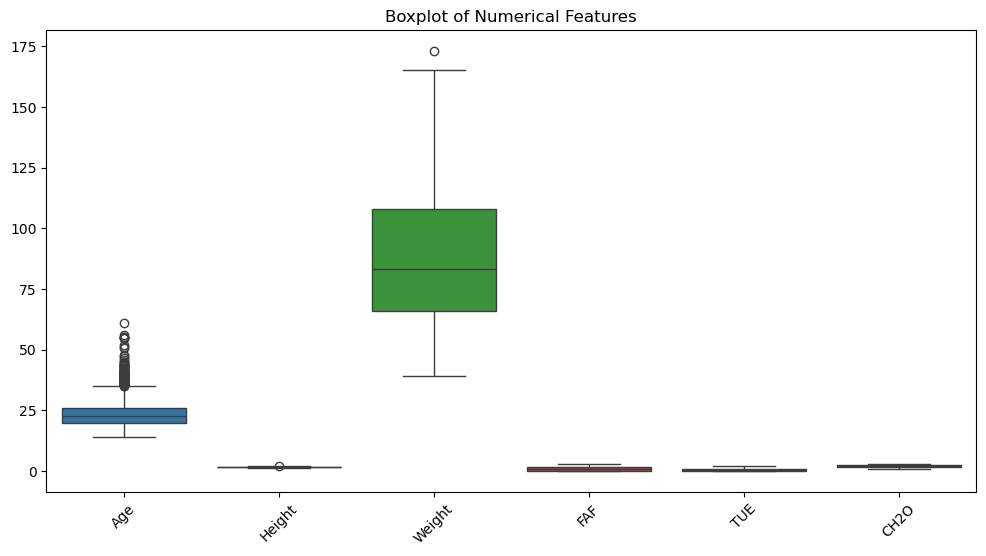

In [41]:
# Boxplot of Numerical Features for Outlier Detection
numerical_cols = ['Age', 'Height', 'Weight', 'FAF', 'TUE', 'CH2O']

plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()

This boxplot is used to identify potential outliers in the numerical features of the dataset, including age, height, weight, physical activity frequency (FAF), time using technology devices (TUE), and daily water consumption (CH2O). Several outliers are observed in some variables, like Age and Weight so we need to remove them for better modeling results.

In [42]:
# Age yang lebih dari 50 diremove
outlier = df[df['Age'] >= 50].shape[0]
print(f"Number of rows: {outlier}")
df = df[df['Age'] <= 50]


Number of rows: 10


In [43]:
# Weight yang lebih dari 170 diremove
outlier = df[df['Weight'] >= 170].shape[0]
print(f"Number of rows: {outlier}")
df = df[df['Weight'] <= 170]


Number of rows: 1


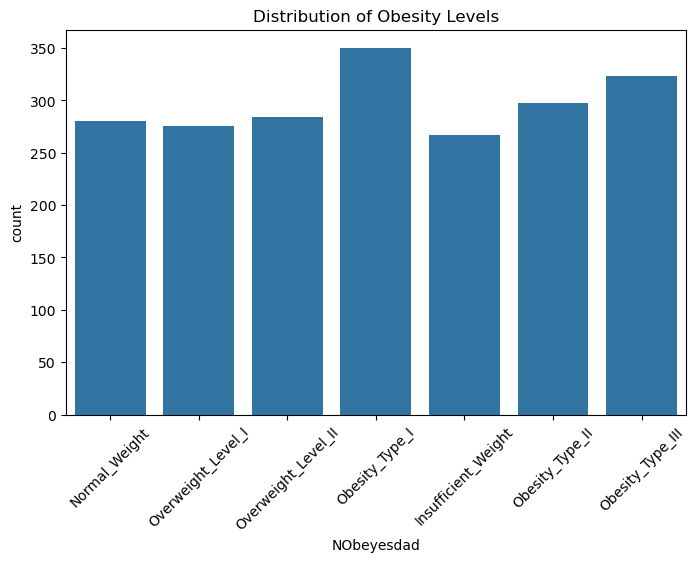

In [44]:
# Distribution of Obesity Levels
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='NObeyesdad')
plt.xticks(rotation=45)
plt.title('Distribution of Obesity Levels')
plt.show()


The distribution of obesity levels illustrates how individuals are spread across different obesity categories in the dataset. This visualization provides an overview of the existing obesity patterns and helps understand the natural grouping tendencies within the data. By observing this distribution, we gain insight into how obesity levels vary among individuals, which can support the interpretation of clustering results and help assess whether the formed clusters align with meaningful obesity-related patterns.

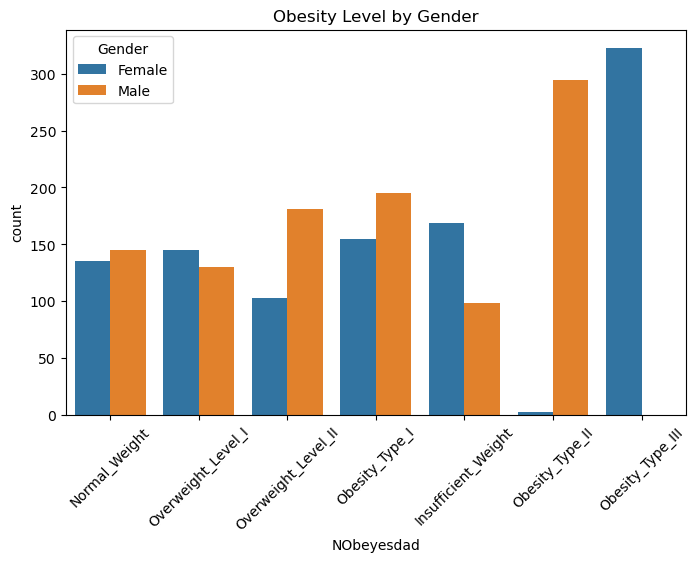

In [45]:
# Gender vs Obesity Level
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='NObeyesdad', hue='Gender')
plt.xticks(rotation=45)
plt.title('Obesity Level by Gender')
plt.show()


This visualization compares obesity levels across different genders to explore whether there are noticeable differences in obesity patterns between male and female individuals. It helps identify potential trends related to gender and obesity prevalence, which can provide useful context for understanding how gender may influence natural groupings within the data. These insights support the interpretation of clustering results by highlighting whether gender-related patterns align with the clusters formed later in the analysis.

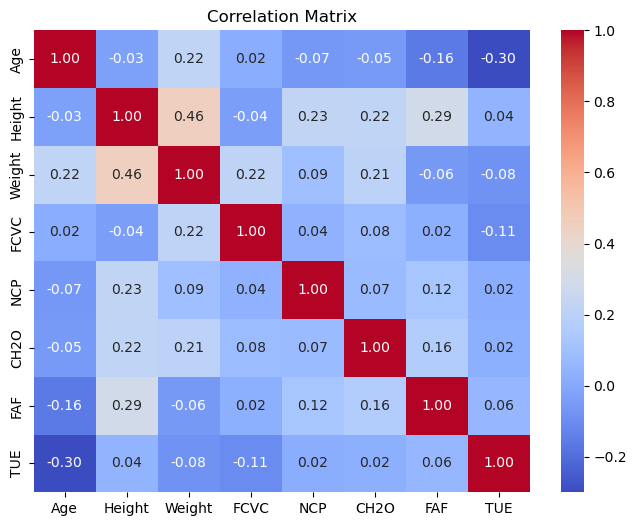

In [46]:
# Correlation Matrix of Numerical Variables
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The correlation matrix illustrates the relationships among numerical variables in the dataset by displaying their correlation coefficients. This visualization helps identify which variables have stronger positive or negative associations with one another. Recognizing these relationships is important for understanding feature dependencies, detecting multicollinearity, and selecting relevant variables that may influence obesity patterns and the formation of meaningful clusters.

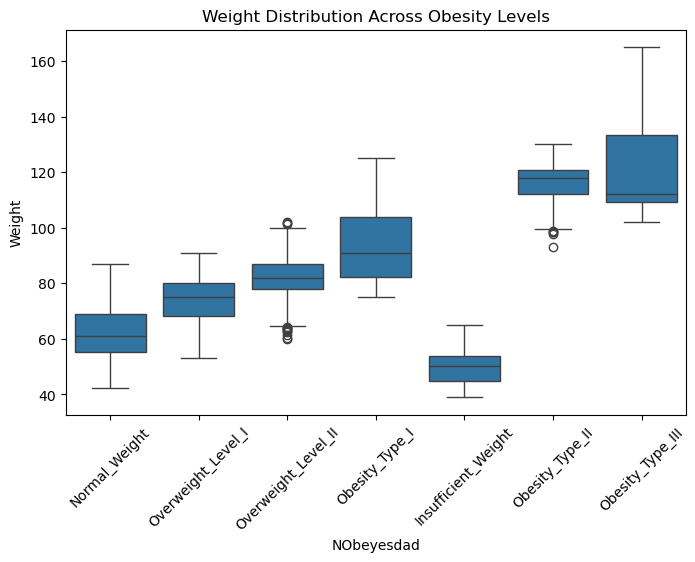

In [47]:
# Boxplot for Weight by Obesity Level
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='NObeyesdad', y='Weight')
plt.xticks(rotation=45)
plt.title('Weight Distribution Across Obesity Levels')
plt.show()


The boxplot visualizes the distribution of body weight across different obesity levels, allowing for a clear comparison between categories. It highlights the median, spread, and variability of weight within each obesity group, as well as potential outliers. This analysis helps assess how body weight varies across obesity levels and provides insight into the role of weight in shaping obesity-related patterns within the dataset.

## Feature Engineering

#### Encoding

We tested nominal and ordinal encoding, but the silhouette score was lower. One-hot encoding performed better, so we used one-hot encoding.

In [48]:
# from sklearn.preprocessing import OrdinalEncoder 

# df_encoded = df.copy()

# # Label Encoding (binary columns)
# label_encode = {
#     'Gender': {'Female': 0, 'Male': 1},
#     'family_history_with_overweight' : {'no': 0, 'yes': 1},
#     'FAVC' : {'no': 0, 'yes': 1},
#     'SMOKE' : {'no': 0, 'yes': 1},
#     'SCC' : {'no': 0, 'yes': 1},   
# }

# for col, mapping in label_encode.items():
#     df_encoded[col] = df_encoded[col].map(mapping)

# # Ordinal Encoding (for CAEC and CALC)
# CAEC_mapping = {
#     'no': 0,
#     'Sometimes': 1,
#     'Frequently': 2,
#     'Always': 3
# }

# CALC_mapping = {
#     'no': 0,
#     'Sometimes': 1,
#     'Frequently': 2,
#     'Always': 3
# }

# df_encoded['CAEC'] = df_encoded['CAEC'].map(CAEC_mapping)
# df_encoded['CALC'] = df_encoded['CALC'].map(CALC_mapping)

# # Nominal Encoding 
# nominal_cols = ['MTRANS']
# encoder = OrdinalEncoder()
# df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

One Hot Encoding 

In [49]:
df_encoded_one = df.copy()

# Label Encoding (binary columns)
label_encode = {
    'Gender': {'Female': 0, 'Male': 1},
    'family_history_with_overweight' : {'no': 0, 'yes': 1},
    'FAVC' : {'no': 0, 'yes': 1},
    'SMOKE' : {'no': 0, 'yes': 1},
    'SCC' : {'no': 0, 'yes': 1},   
}

for col, mapping in label_encode.items():
    df_encoded_one[col] = df_encoded_one[col].replace(mapping)

# One Hot Encoding (categorical columns)
df_encoded_one = pd.get_dummies(
    df_encoded_one,
    columns=['MTRANS', 'CAEC', 'CALC'],
    drop_first=True
)

C:\Users\celin\AppData\Local\Temp\ipykernel_23132\925628510.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded_one[col] = df_encoded_one[col].replace(mapping)


#### Add New Feature

We added a new feature, BMI, to improve the model’s performance.

In [50]:
df_encoded_one['BMI'] = df_encoded_one['Weight'] / (df_encoded_one['Height'] ** 2)

#### Scaling

We made two dataframes, scaled (df_encoded_one) and unscaled (df_encoded_one_sc) to compare the results after modeling.

In [51]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
scale_cols = ['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Columns not to scale
other_cols = [col for col in df_encoded_one.columns if col not in scale_cols]

sc = StandardScaler()
scaled_data = sc.fit_transform(df_encoded_one[scale_cols])
df_scaled = pd.DataFrame(scaled_data, columns=scale_cols)
df_encoded_one_sc = pd.concat([df_encoded_one[other_cols].reset_index(drop=True), df_scaled.reset_index(drop=True)], axis=1)

In [52]:
# Drop the target variable 
df_encoded_one = df_encoded_one.drop(columns=['NObeyesdad'])
df_encoded_one_sc = df_encoded_one_sc.drop(columns=['NObeyesdad'])

In [53]:
for col in df_encoded_one.select_dtypes(include='bool').columns:
    df_encoded_one[col] = df_encoded_one[col].astype(int)

for col in df_encoded_one_sc.select_dtypes(include='bool').columns:
    df_encoded_one_sc[col] = df_encoded_one_sc[col].astype(int)

In [54]:
df_encoded_one.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0,1,0,0,1,0,0,0,1,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0,1,0,0,1,0,0,1,0,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0,1,0,0,1,0,1,0,0,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0,0,1,0,1,0,1,0,0,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0,1,0,0,1,0,0,1,0,28.342381


In [55]:
df_encoded_one_sc.head()

,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,...,CALC_no,Age,Height,Weight,BMI,FCVC,NCP,CH2O,FAF,TUE
0,0,1,0,0,0,0,0,1,0,0,...,1,-0.533092,-0.886059,-0.873587,-0.670617,-0.787768,0.392179,-0.006437,-1.184973,0.550064
1,0,1,0,1,1,0,0,1,0,0,...,0,-0.533092,-1.958658,-1.179312,-0.689090,1.082123,0.392179,1.635753,2.329662,-1.094792
2,1,1,0,0,0,0,0,1,0,0,...,0,-0.200982,1.044619,-0.376784,-0.747987,-0.787768,0.392179,-0.006437,1.158117,0.550064
3,1,0,0,0,0,0,0,0,1,0,...,0,0.463237,1.044619,0.005372,-0.363507,1.082123,0.392179,-0.006437,1.158117,-1.094792
4,1,0,0,0,0,0,0,1,0,0,...,0,-0.367037,0.830099,0.112376,-0.177829,-0.787768,-2.223023,-0.006437,-1.184973,-1.094792


## Modeling

#### KMeans

In [56]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

Using Unscaled Data (df_encoded_one) 

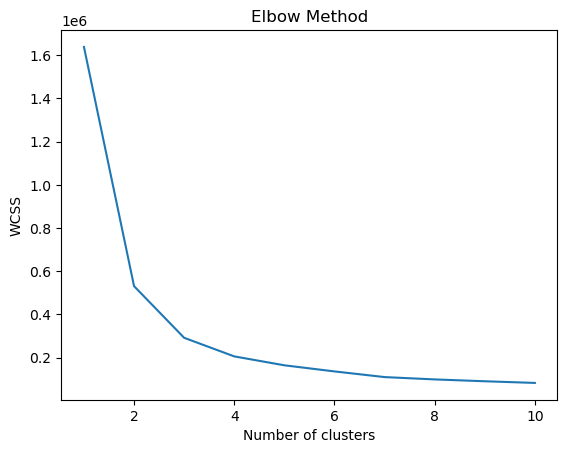

In [57]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_encoded_one)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters          WCSS
0                   1  1.638542e+06
1                   2  5.308059e+05
2                   3  2.915403e+05
3                   4  2.054610e+05
4                   5  1.642046e+05
5                   6  1.358987e+05
6                   7  1.096328e+05
7                   8  9.884481e+04
8                   9  9.029207e+04
9                  10  8.261226e+04


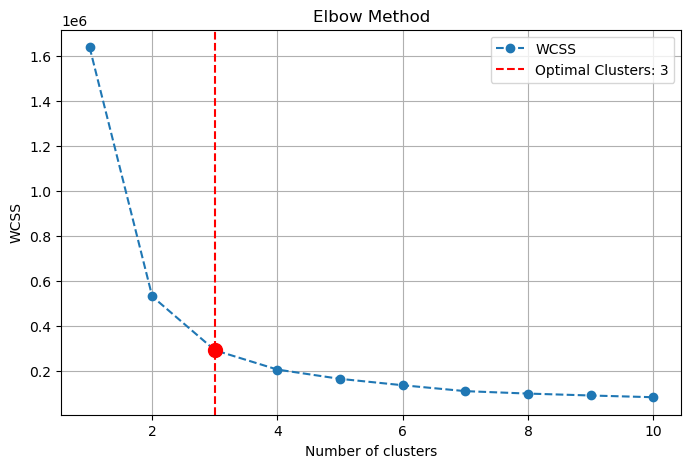

The optimal number of clusters is: 3


In [59]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [60]:
# Fit K-Means to the data with the optimal number of K cluster
kmeans_no_sc = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters_no_sc = kmeans_no_sc.fit_predict(df_encoded_one)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters_no_sc
sil_score = silhouette_score(df_encoded_one, clusters_no_sc)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.5035448905724916


Using Scaled Data (df_encoded_one_sc) 

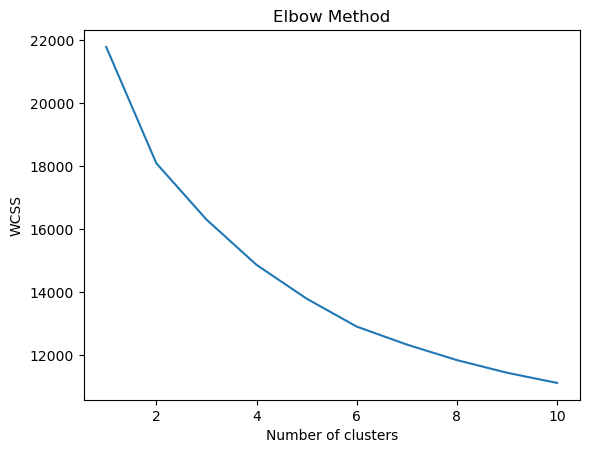

In [61]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_encoded_one_sc)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [62]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters          WCSS
0                   1  21787.766378
1                   2  18096.503588
2                   3  16309.998203
3                   4  14870.453619
4                   5  13797.007992
5                   6  12909.812696
6                   7  12340.035037
7                   8  11846.257970
8                   9  11445.164969
9                  10  11121.898471


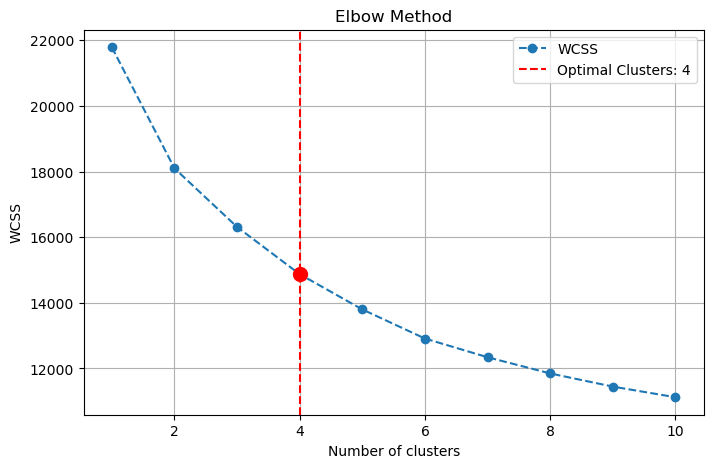

The optimal number of clusters is: 4


In [63]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [64]:
# Fit K-Means to the data with the optimal number of K cluster
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_encoded_one_sc)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster_SC'] = clusters
sil_score = silhouette_score(df_encoded_one, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.10759946645770474


#### Hierarchical Agglomerative Clustering

Using Unscaled Data (df_encoded_one) 

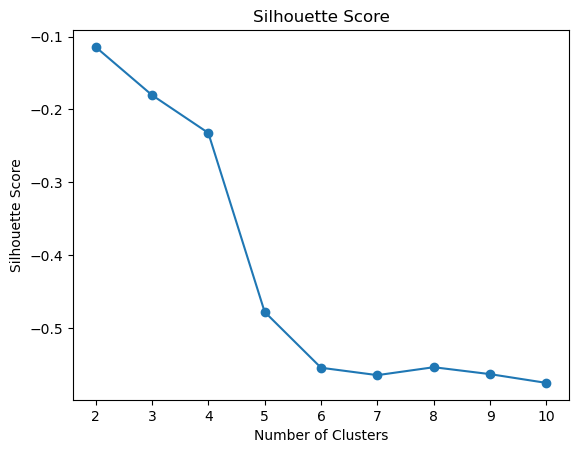

In [65]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

#tentuin sndr rangenya (mau brp k)
for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_encoded_one)
    silhouette_avg = silhouette_score(df_encoded_one, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


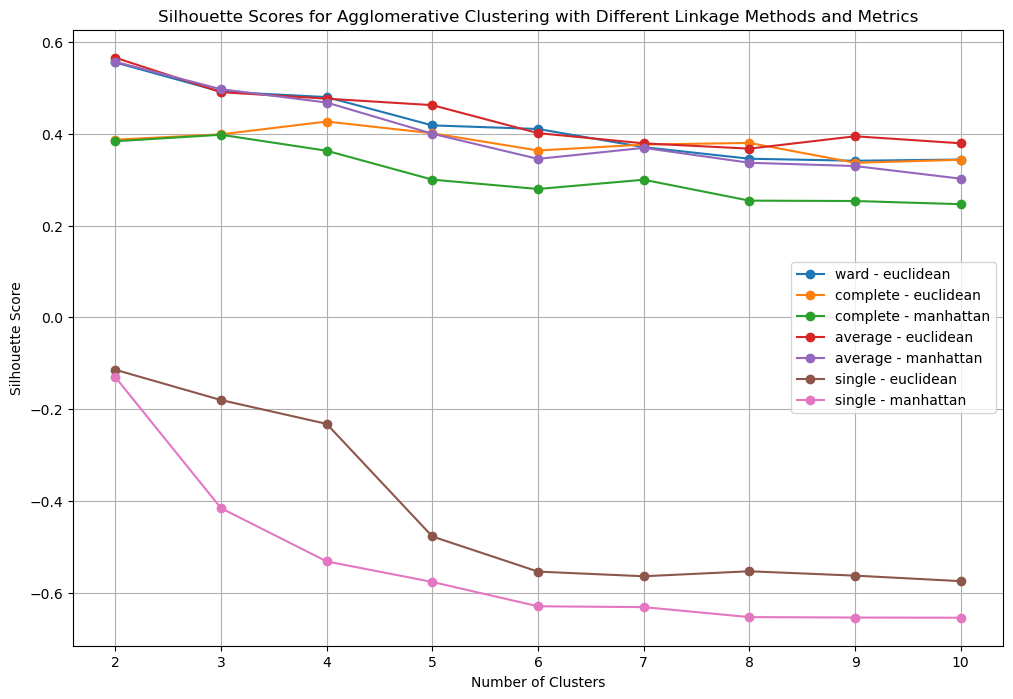

Best Silhouette Score: 0.5662545278780183
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: euclidean


In [66]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)

#linkage - jarak antar clusternya
linkage_methods = ['ward', 'complete', 'average', 'single']

# metric (Euclidean) - jarak antar data points, 1 titik ke titik lain
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        # khusus WARD, ga bisa dipake bareng manhattan
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_encoded_one)
            silhouette_avg = silhouette_score(df_encoded_one, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

In [67]:
# Hierarchical Clustering
agglo_unscaled = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_unscaled = agglo_unscaled.fit_predict(df_encoded_one)

Using Scaled Data (df_encoded_one_sc) 

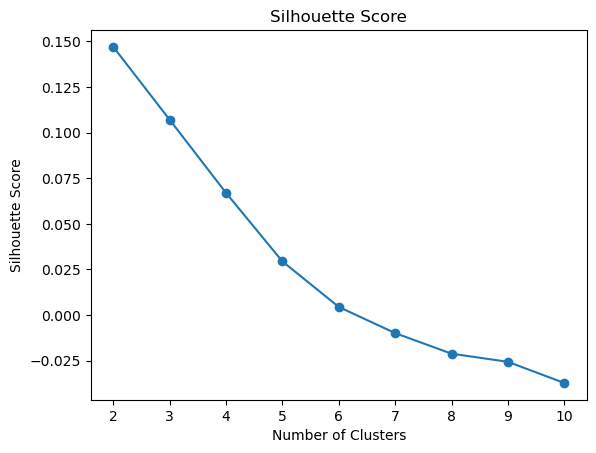

In [68]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

#tentuin sndr rangenya (mau brp k)
for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_encoded_one_sc)
    silhouette_avg = silhouette_score(df_encoded_one_sc, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


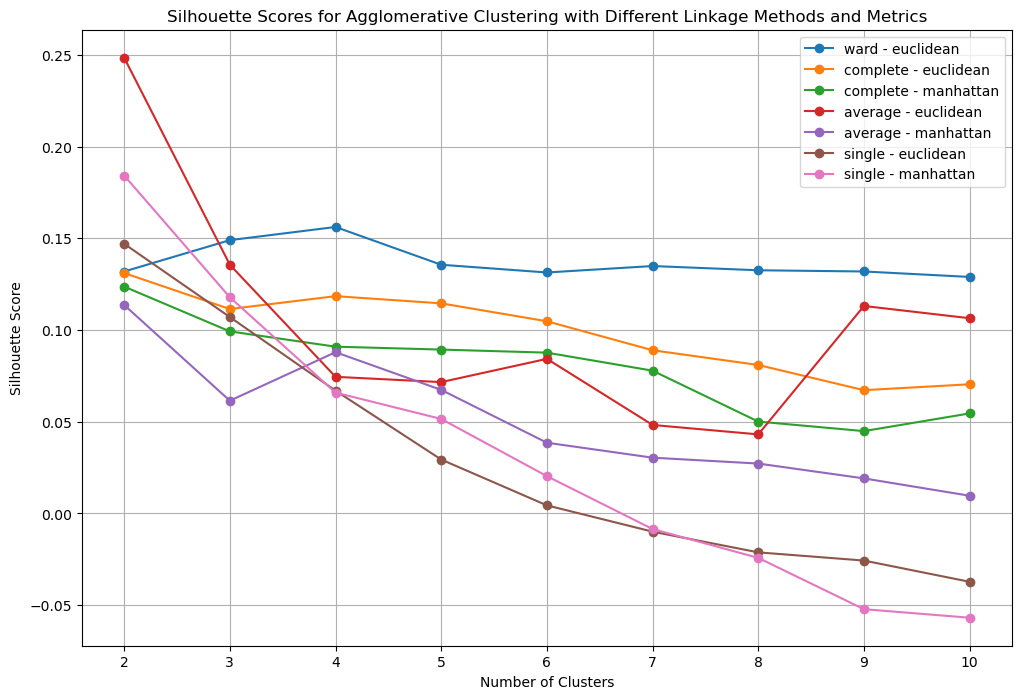

Best Silhouette Score: 0.2484982820131225
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: euclidean


In [69]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)

#linkage - jarak antar clusternya
linkage_methods = ['ward', 'complete', 'average', 'single']

# metric (Euclidean) - jarak antar data points, 1 titik ke titik lain
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        # khusus WARD, ga bisa dipake bareng manhattan
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_encoded_one_sc)
            silhouette_avg = silhouette_score(df_encoded_one_sc, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

In [70]:
# Hierarchical Clustering
agglo_scaled = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_scaled = agglo_scaled.fit_predict(df_encoded_one_sc)

Silhoutte Score Results

KMEANS
- df_encoded_one: 0.5035 (3 cluster)
- df_encoded_one_sc : 0.1075 (4 cluster)

AGGLO
- df_encoded_one: 0.5662 (2 cluster) 
- df_encoded_one_sc : 0.2484 (2 cluster)





### PCA + Agglo

In [71]:
# PCA AFTER scaling
pca = PCA(n_components=0.9, random_state=42)
X_pca = pca.fit_transform(df_encoded_one_sc)

print("Number of PCA components:", X_pca.shape[1])

# Agglomerative with stable configuration
agglo_pca = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'   # FIXED ON PURPOSE
)

y_agglo_pca = agglo_pca.fit_predict(X_pca)

print("Agglo + PCA Silhouette:",
      silhouette_score(X_pca, y_agglo_pca))

print("Cluster distribution (Agglo + PCA):")
print(pd.Series(y_agglo_pca).value_counts())

Number of PCA components: 9
Agglo + PCA Silhouette: 0.1615775774671269
Cluster distribution (Agglo + PCA):
2    903
1    658
0    515
Name: count, dtype: int64


In [72]:
# Simpan hasil clustering PCA ke dataframe utama
df['Agglo_PCA'] = y_agglo_pca

Although the silhouette score obtained after applying PCA is lower than the model without PCA, the clustering result with PCA produces more balanced cluster sizes and avoids singleton clusters. PCA helps reduce noise and feature redundancy, leading to more stable and interpretable clusters. Therefore, Agglomerative Clustering with PCA was selected despite the lower silhouette score, as interpretability and cluster stability were prioritized over purely distance-based evaluation.

In [73]:
# Add the cluster labels to the original data
df['Agglo_Scaled'] = y_scaled
df['Agglo_Unscaled'] = y_unscaled

# Analyze the clusters with the original values
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,MTRANS,NObeyesdad,KMeans_Cluster,KMeans_Cluster_SC,Agglo_PCA,Agglo_Scaled,Agglo_Unscaled
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,0.0,1.0,no,Public_Transportation,Normal_Weight,1,1,2,0,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1,1,2,0,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0,1,2,0,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,2.0,0.0,Frequently,Walking,Overweight_Level_I,0,0,0,0,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0,2,0,0,1


#### K-Means Result

Using Unscaled Data (df_encoded_one) 

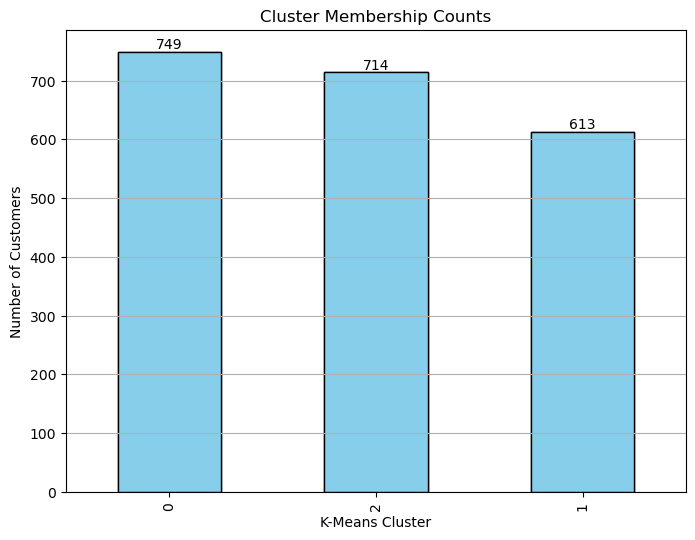

In [74]:
# brp anggota di cluster
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
ax = cluster_counts.plot(kind='bar', edgecolor='black')
for i, value in enumerate(cluster_counts.values):
    ax.text(
        i,
        value,
        str(value),
        ha='center',
        va='bottom',
        fontsize=10
    )
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


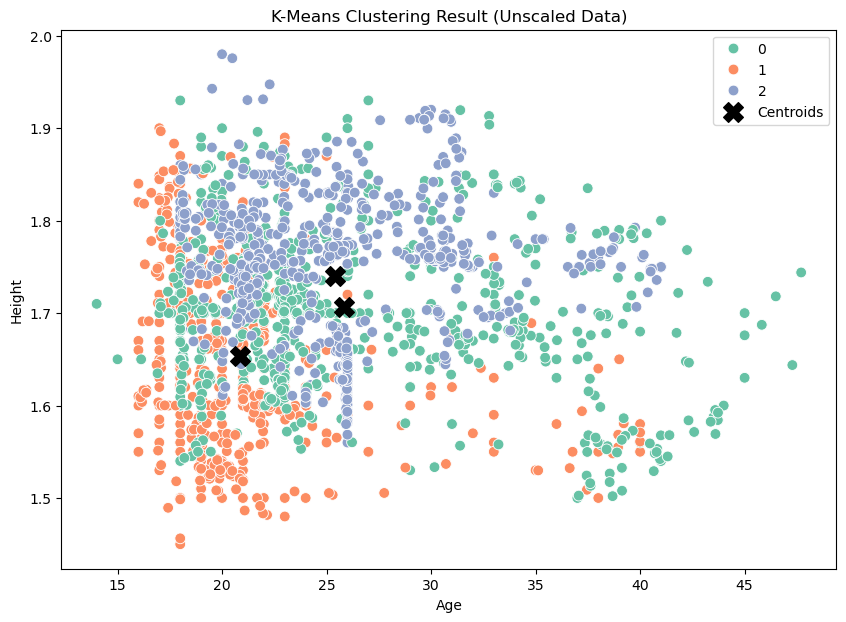

In [75]:
plt.figure(figsize=(10, 7))

sns.scatterplot(
    x=df_encoded_one["Age"],
    y=df_encoded_one["Height"],
    hue=clusters_no_sc,
    palette="Set2",
    s=60
)

# get column indices
age_idx = df_encoded_one.columns.get_loc("Age")
height_idx = df_encoded_one.columns.get_loc("Height")

# plot centroids correctly
plt.scatter(
    kmeans_no_sc.cluster_centers_[:, age_idx],
    kmeans_no_sc.cluster_centers_[:, height_idx],
    s=200,
    c="black",
    marker="X",
    label="Centroids"
)

plt.xlabel("Age")
plt.ylabel("Height")
plt.title("K-Means Clustering Result (Unscaled Data)")
plt.legend()
plt.show()


Using Scaled Data (df_encoded_one_sc) 

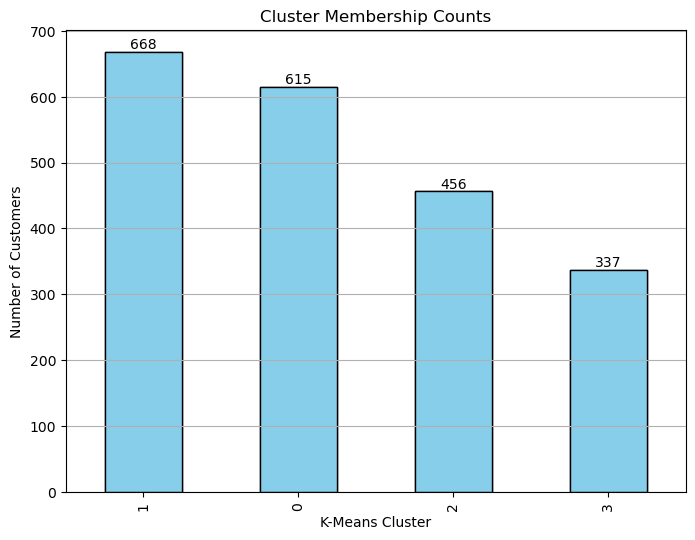

In [76]:
# brp anggota di cluster
cluster_counts = df['KMeans_Cluster_SC'].value_counts()

plt.figure(figsize=(8, 6))
ax = cluster_counts.plot(kind='bar', edgecolor='black')
for i, value in enumerate(cluster_counts.values):
    ax.text(
        i,
        value,
        str(value),
        ha='center',
        va='bottom',
        fontsize=10
    )
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


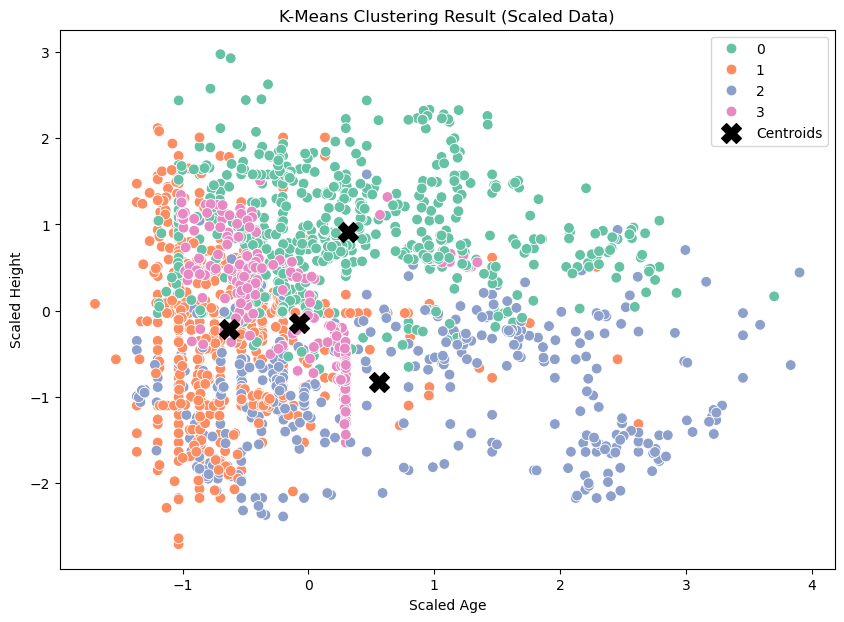

In [77]:
plt.figure(figsize=(10, 7))

sns.scatterplot(
    x=df_encoded_one_sc["Age"],
    y=df_encoded_one_sc["Height"],
    hue=clusters,
    palette="Set2",
    s=60
)

# get column indices
age_idx = df_encoded_one_sc.columns.get_loc("Age")
height_idx = df_encoded_one_sc.columns.get_loc("Height")

# plot centroids correctly
plt.scatter(
    kmeans.cluster_centers_[:, age_idx],
    kmeans.cluster_centers_[:, height_idx],
    s=200,
    c="black",
    marker="X",
    label="Centroids"
)

plt.xlabel("Scaled Age")
plt.ylabel("Scaled Height")
plt.title("K-Means Clustering Result (Scaled Data)")
plt.legend()
plt.show()


For K-Means, the Scaled Data has a better clustering result then the Unscaled Data. This does NOT align with the silhoutte score, where Scaled Data (0.1075) actually has a lower score then the Unscaled Data (0.5035)

#### Hierarchical Clustering Results

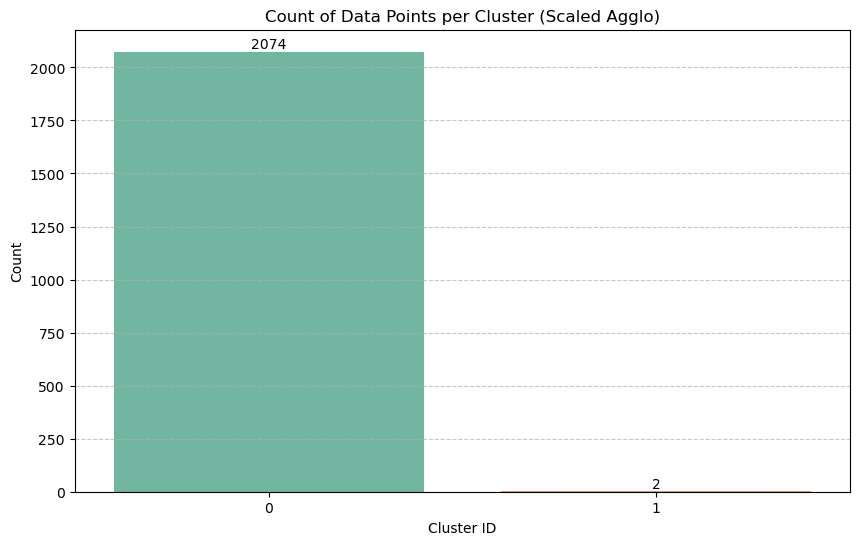

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo_Scaled'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Scaled Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

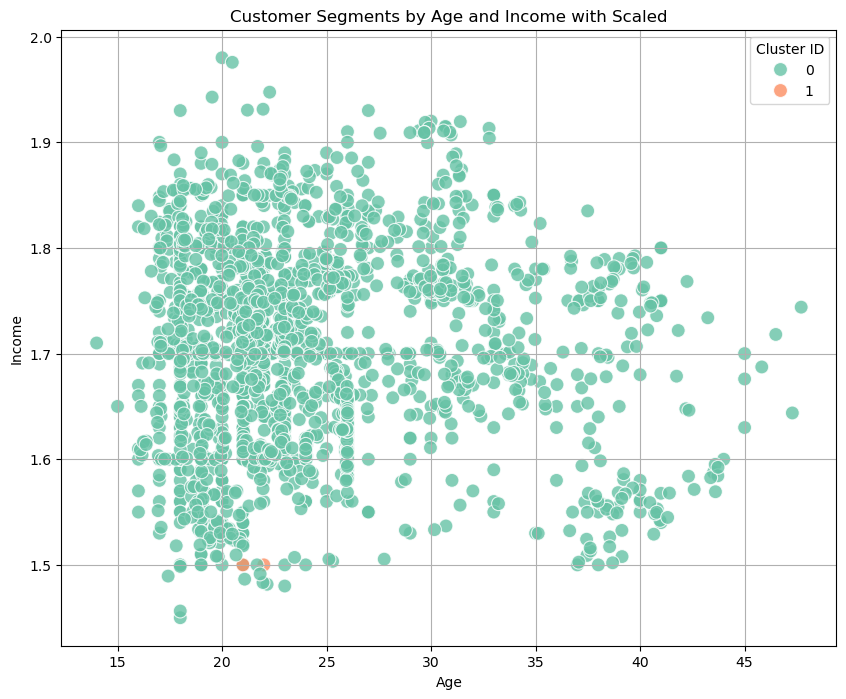

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Height', hue='Agglo_Scaled', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Age and Height with Scaled')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

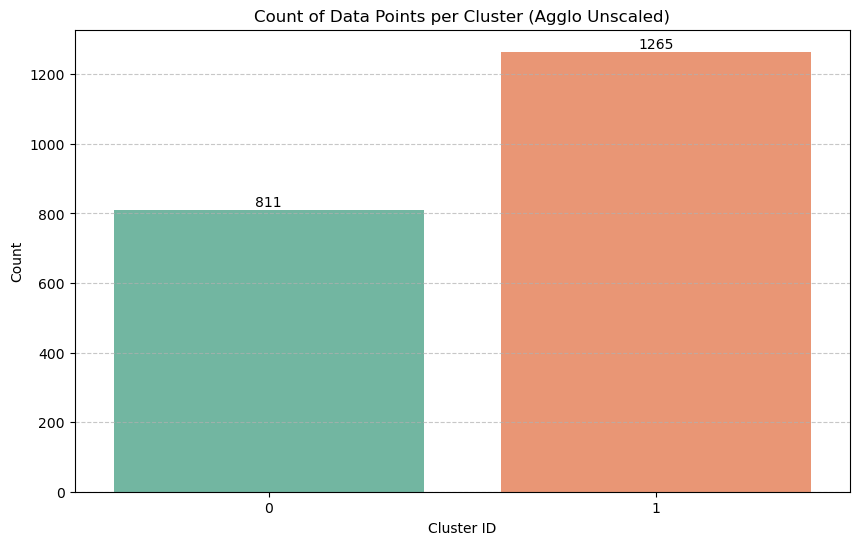

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo_Unscaled'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo Unscaled)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

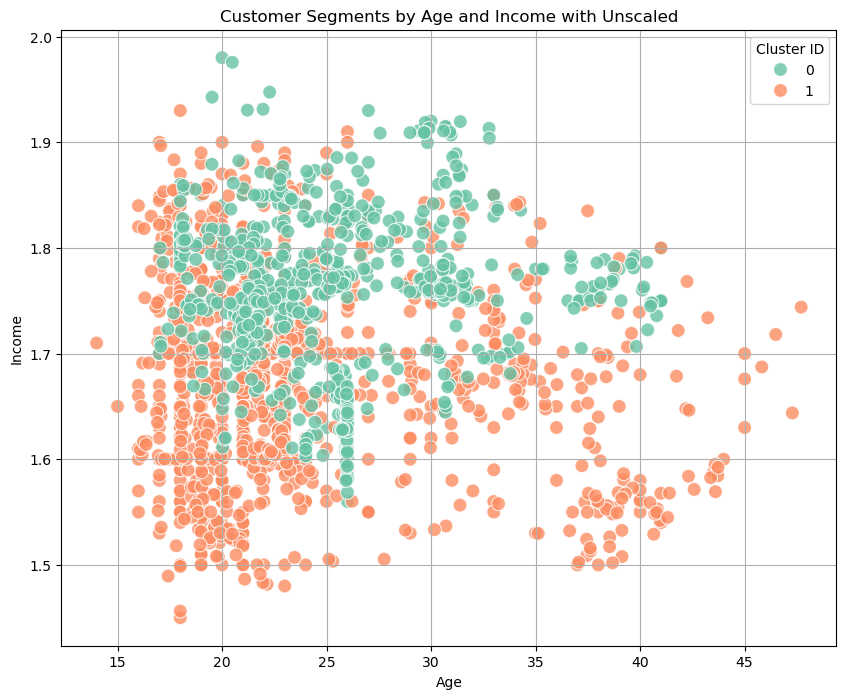

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Height', hue='Agglo_Unscaled', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Age and Height with Unscaled')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

For Hierarchical Agglomerative modeling, the Unscaled Data has a better clustering result then the Scaled Data. This does align with the silhoutte score, where unscaled data (0.5662) has better score then scaled data (0.2484)

### PCA + Agglo Visualization

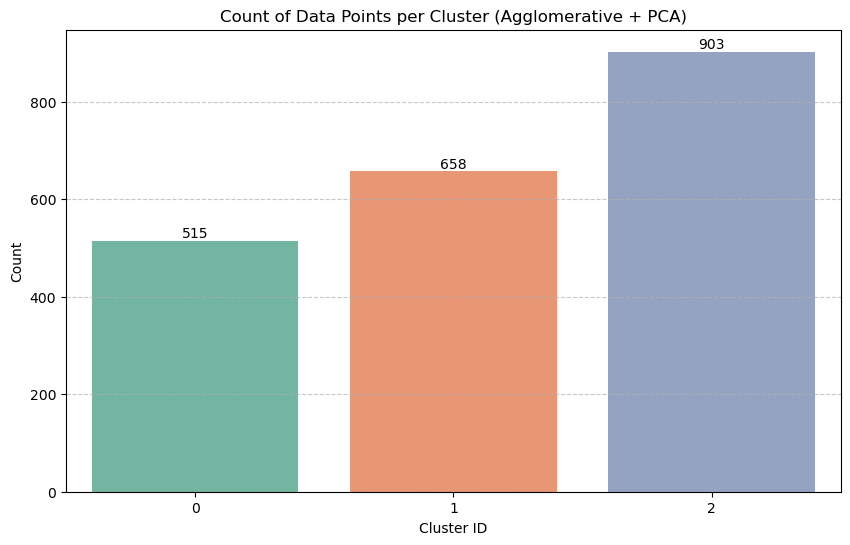

In [82]:
# Hitung jumlah data per cluster (PCA)
cluster_counts = df['Agglo_PCA'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=cluster_counts.index,
    y=cluster_counts.values,
    hue=cluster_counts.index,
    palette='Set2',
    legend=False
)

# Label angka di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglomerative + PCA)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

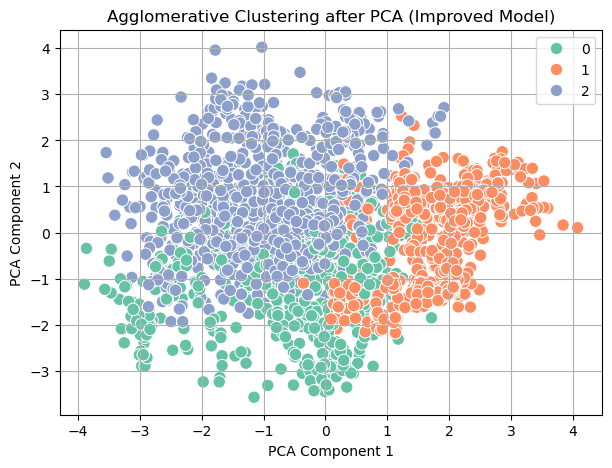

In [83]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=y_agglo_pca,
    palette='Set2',
    s=80
)
plt.title("Agglomerative Clustering after PCA (Improved Model)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

## Model Evaluation

The clustering performance was evaluated by comparing multiple algorithms and preprocessing strategies, including K-Means and Hierarchical Agglomerative Clustering, applied to both scaled and unscaled datasets. Since this study focuses on unsupervised learning, traditional classification metrics such as accuracy, precision, recall, and confusion matrix are not applicable. Therefore, evaluation relied on internal validation metrics, primarily the Silhouette Score, supported by WCSS analysis and visual inspection.

K-Means clustering performed better on the scaled dataset, where the clusters appeared more clearly separated and more balanced. Feature scaling ensured that all variables contributed equally to distance calculations, preventing dominance by features with larger numerical ranges. In contrast, K-Means applied to the unscaled dataset was influenced by variables with wider value ranges, resulting in more overlapping and less interpretable clusters.

Hierarchical Agglomerative Clustering showed relatively strong numerical performance on the unscaled dataset, achieving a higher Silhouette Score with fewer clusters. However, the resulting cluster structure was coarse and provided limited insight into detailed lifestyle patterns. When applied to the scaled dataset, the performance of hierarchical clustering decreased, further indicating its sensitivity to preprocessing choices.

PCA was applied mainly to support visualization and exploratory analysis. While PCA reduced the Silhouette Score, it helped produce a more visually balanced cluster distribution in lower-dimensional space. This highlights a trade-off between quantitative clustering performance and visual interpretability. Overall, K-Means clustering with scaled data was selected as the most appropriate approach. Scaling improved cluster separation, balance, and reliability by ensuring fair contribution from all features. The resulting clusters reflect meaningful differences in physical condition, eating habits, and activity levels, supporting the conclusion that obesity is influenced by multiple lifestyle-related factors rather than a single variable.

## Insights, Interpretations and Conclusions

The dataset “Obesity Levels Based on Eating Habits and Physical Condition” was obtained from the UCI Machine Learning Repository and is designed to analyze factors influencing obesity levels in individuals. The dataset contains demographic variables such as age, gender, height, and weight, as well as lifestyle-related features including eating habits, physical activity, family history of overweight, and other behavioral indicators associated with obesity. Initial inspection shows that the dataset is complete and consistent, with no missing values, making it suitable for clustering analysis after appropriate preprocessing.

Using K-Means clustering on the scaled dataset, four distinct clusters were identified based on the Elbow Method and supported by Silhouette Score evaluation. Feature scaling ensured that all variables contributed equally to distance calculations, preventing dominance by attributes with larger numerical ranges. The resulting cluster distribution shows moderate balance across clusters, with Cluster 1 consisting of 668 individuals, Cluster 0 containing 615 individuals, Cluster 2 including 456 individuals, and Cluster 3 comprising 337 individuals. Although the cluster sizes are not perfectly equal, no single cluster dominates the dataset, indicating that the model captures meaningful population segmentation.

From a behavioral and physical condition perspective, the clusters reflect differences in age, body measurements, eating habits, and physical activity patterns. The separation observed in the clustering visualization suggests that individuals with similar lifestyle behaviors and physical characteristics tend to be grouped together. This supports the assumption that obesity-related factors are influenced by combinations of dietary habits, activity levels, and demographic attributes rather than a single variable.

Although PCA-based clustering resulted in lower Silhouette Scores, it provided clearer visual separation among clusters by reducing dimensional complexity. This highlights an important trade-off while PCA improves visualization and interpretability in reduced-dimensional space, it compresses feature-level information that is important for maximizing clustering cohesion. Therefore, PCA was primarily used for exploratory visualization rather than final model selection.

In conclusion, the K-Means clustering model applied to the scaled dataset with four clusters was identified as the most appropriate approach for this study. It offers a balance between numerical performance, interpretability, and practical relevance. The results demonstrate that unsupervised learning can effectively segment individuals based on obesity-related behaviors and physical conditions. These insights may support health-related analysis, targeted interventions, and policy design by enabling more personalized strategies for different population groups based on lifestyle and risk profiles.